<a href="https://colab.research.google.com/github/Boulder1-kihara/training-a-model-using-iris-dataset/blob/main/iriiis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Step 1:Load and Prepare the Data
Lets iport the required models.

the following libraries used are:
1. pandas
2. numpy
3. scikit learn

In [ ]:
# Import the fundamental tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 📊 Step 2: Load the Iris Dataset
We will use the famous Iris Dataset, which is a perfect, clean dataset for your first classification problem. It has 150 flower samples from three species, with four measurements (features) each: sepal length, sepal width, petal length, and petal width.

In [ ]:
#load the data set using the "load iris"
iris = load_iris()

#eperate feature(x) and target/labels(y)
x = iris.data
y = iris.target

#display the features and target names to see what we are working with
print("features: ", iris.feature_names)
print("Target classes: ", iris.target_names)
print("shape of x(Data): ", x.shape)

features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes:  ['setosa' 'versicolor' 'virginica']
shape of x(Data):  (150, 4)


# Split the Data
Next, we will split the data.

**You must never train and test on the same data.**

we split the data into a **training set**(to teach the model) and a **testing** set to evaluate it.

A common split is **80% for training** and **20% for testing**

In [ ]:
#split 80% for training and 20% for evaluation
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Training samples\n: ", x_train.shape[0])
print("testing samples: ", x_test.shape[0])

Training samples
:  120
testing samples:  30


# 🧠 Step 3: Train and Evaluate the Model
We'll use K-Nearest Neighbors (KNN), which is one of the simplest and most intuitive ML algorithms.

It classifies a new point based on the majority class of its 'K' nearest neighbors.

# 1. Choose the Model and Hyperparameters:
We choose the **KNeighborsClassifier** and set $K=3$ (meaning it looks at the 3 closest points).

In [ ]:
#chose the model and hyper parameters: K-nearest Neighbors classifier
model = KNeighborsClassifier(n_neighbors=3)

# 2. Train the Model (The "Learning" Step):
This is where the magic happens! You train the model using your training data.

".fit" is used to fit the training data

In [ ]:
#Train the model(fit the training data)
model.fit(x_train, y_train)
print("Model trained successfully!")

Model trained successfully!


# 3. Make Predictions:
Now, use the trained model to predict the species for the unseen testing data.

In [ ]:
#3. Make predictions on the unseen data
y_pred = model.predict(x_test)

# 4. Evaluate Performance:
Calculate the accuracy—the percentage of correct predictions.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Model accuracy: 100.00%


# 💡 Step 4: The Theory - Gradient Descent

**KNN** is a "lazy" algorithm (it doesn't truly learn weights during training), but almost all other powerful algorithms (like Linear Regression, Neural Networks, etc.) rely on Gradient Descent.

**The Analogy:** Imagine you are standing on a hill (this hill represents the Cost/Loss Function—how much error your model has). You want to find the lowest point of the hill, which is where your model's error is minimized.

**The Process:** You can't see the whole landscape, so you take small steps in the direction that goes down the steepest. This "steepest direction" is the negative of the gradient (the slope).

The **"Gradient"** tells you the slope.

The **"Descent"** is the step you take.

The **"Learning Rate"** is the size of your step (too large and you overshoot; too small and it takes forever).


**What it does:** It repeatedly adjusts the model's internal numbers (weights) to reduce the error until it hits the lowest point (or close to it).

1. we will first define the loss/cost function which is (x²-4x+4) where the minimum is at x=2 where f(X) = 0

In [ ]:
#lets create a function called f with parameter x
def f(x):
  #the function we want to minimize th cost/loss
  return x**2 - 4 * x + 4

2. Define the derivative(the gradient)
f(x) = x²-4x+4

f'(x) = 2x - 4

The derivative tells us the slope/gradient at amy point x

In [ ]:
#lets create a functioncalled gradient with parameter x
def gradient(x):
  #the first derivative/gradient
  return 2*x - 4

3. The core gradient descent algorithm

x_new = x_old - learning_rate * gradient(x_old)

In [ ]:
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]

    for i in range(num_iterations):
        # Calculate the gradient (slope) at the current position 'x'
        grad = gradient(x)

        # Take a step in the OPPOSITE direction of the gradient
        x = x - learning_rate * grad

        history.append(x)

        # Check for convergence (optional but good practice)
        if abs(grad) < 1e-4:
            print(f"Converged after {i+1} iterations.")
            break

    return x, history

4. Run the algorithm and visualize

In [ ]:
#parameters
#start far away from the minimum
starting_point = 0.0

#the step size
learning_rate = 0.1

#how many steps to take
num_iterations = 50

#run the algorithm
final_x, history = gradient_descent(starting_point, learning_rate, num_iterations)

#output results
print(f"\n starting point: x = {starting_point}")
print(f"final minimum x-value: {final_x:.4}")
print(f"final minimum f(x) value: {f(final_x):.4f}")

Converged after 49 iterations.

 starting point: x = 0.0
final minimum x-value: 2.0
final minimum f(x) value: 0.0000


5. visualisation

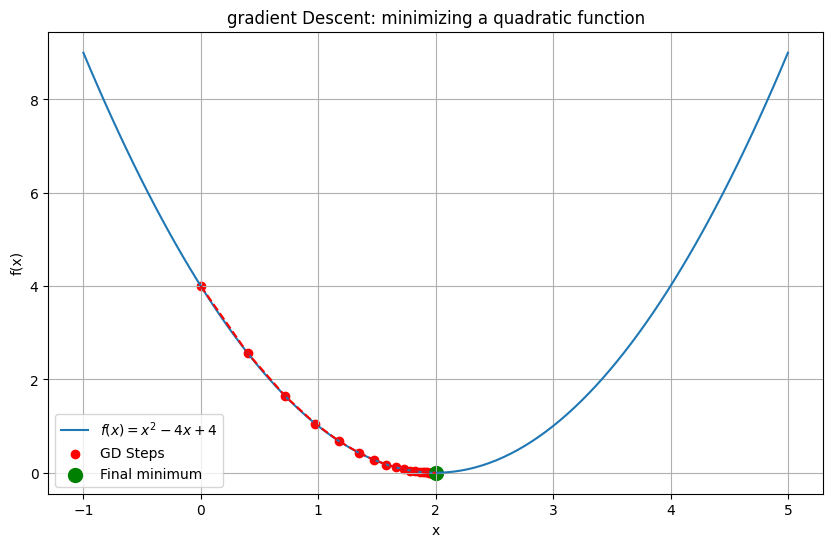

In [ ]:
x_values = np.linspace(-1, 5, 100)
y_values = f(x_values)

plt.figure(figsize=(10, 6))

#the cost function
plt.plot(x_values, y_values, label='$f(x) = x^2 - 4x + 4$')

#the path taken
plt.scatter(history, f(np.array(history)), c='red', marker='o', label='GD Steps')

plt.plot(history, f(np.array(history)), 'r--')

plt.scatter(final_x, f(final_x), c='green', s=100, label='Final minimum')

plt.title('gradient Descent: minimizing a quadratic function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Key Observation
The dots, which represent the position of the parameter $x$ at each iteration of the algorithm, become highly concentrated near the minimum because of how the gradient (the slope) and the learning rate interact.

# 📉 Why Steps Get Smaller Near the Minimum
The core reason the steps shrink and become concentrated is the diminishing value of the Gradient ($\frac{\partial f}{\partial x}$) as the algorithm approaches the minimum.

# 1. The Role of the Gradient
**Far from Minimum (High Loss)**

When you are far up the curve (high loss), the slope (gradient) is steep. A steep slope means the value of the gradient is large. Since the update rule is:

  $$x_{\text{new}} = x_{\text{old}} - \text{Learning Rate} \times \text{Gradient}$$




A large gradient results in a large step size, so the dots are spread far apart.


**Near the Minimum (Low Loss)**

As you get closer to the bottom of the bowl (the minimum), the slope becomes **less** steep and approaches zero.

  **Right at the minimum**, the slope is exactly zero ($\frac{\partial f}{\partial x} = 0$).
    
  Since the gradient is now a small value, the update rule causes only a **very small adjustment** to $x$.

#  2. The Result: Precision
Because the magnitude of the step is directly proportional to the magnitude of the slope, the algorithm naturally slows down and takes tiny, precise steps as it "zeros in" on the lowest point, leading to the dense concentration of dots you observed.

This is a desirable feature, as it allows the algorithm to find the minimum with high accuracy without overshooting it.

If the algorithm used a fixed large step size regardless of the slope, it would constantly jump back and forth over the minimum, never settling (a phenomenon called oscillation).

# 3. Key Concept: The Update Rule
The entire process boils down to this single, crucial line of code:$$x_{\text{new}} = x_{\text{old}} - \eta \cdot \frac{\partial f}{\partial x}$$

$x_{\text{new}}$: Your next step down the hill.

$x_{\text{old}}$: Your current position.

$\eta$ (Learning Rate): How big of a step you take (we used $0.1$).

$\frac{\partial f}{\partial x}$: The Gradient (slope) at your current position. The minus sign ensures you always move in the direction of steepest descent (downhill).

This code visualizes that "ball rolling down the bowl" analogy.

This video explains the core mechanics of how the gradient is used to adjust parameters iteratively, which aligns perfectly with the simple NumPy code you are about to run.

[Gradient Descent, Step-by-Step](https:////www.youtube.com/watch?v=sDv4f4s2SB8)